## 라이브러리 설치 및 구글 드라이브 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 나눔폰트 설치 및 확인

In [2]:
# 한국어 출력을 위한 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

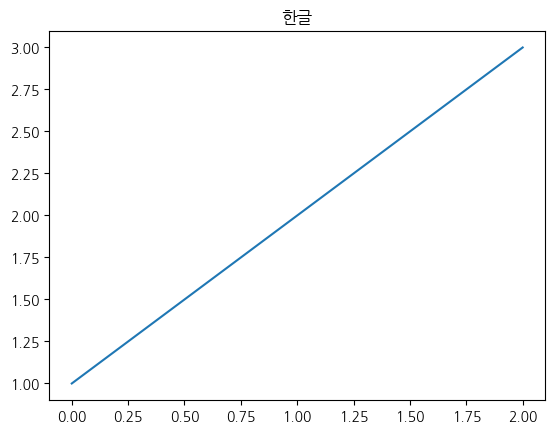

In [3]:
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 데이터 불러오기

In [4]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/jeju/'
af_result1 = pd.read_csv(DATA_PATH + '2022_af_result1.csv')
af_result1

,분류,세부분류,사례수,7월 전반(~7/15),7월 후반(~7/31),8월 전반(~8/15),8월 후반(~8/31),가족/친척,친구/연인,혼자,...,매우 불만족/불만족,보통_y.1,만족/매우 만족,척도평균_y,100점평균_y,제주도 우선,제주도/해외여행 모두,해외여행 우선,둘 다 안함,모름
0,전체,NaN,629,23.8,39.3,35.9,16.1,71.2,20.0,6.5,...,13.4,49.8,36.9,3.25,56.20,22.4,32.6,34.5,2.2,8.3
1,성별,남자,366,22.4,39.3,36.3,16.7,69.9,18.9,8.5,...,16.1,49.2,34.7,3.19,54.64,19.9,33.9,38.0,1.9,6.3
2,성별,여자,263,25.9,39.2,35.4,15.2,73.0,21.7,3.8,...,9.5,50.6,39.9,3.33,58.37,25.9,30.8,29.7,2.7,11.0
3,연령,15~20세,13,15.4,46.2,53.8,7.7,69.2,30.8,0.0,...,7.7,38.5,53.8,3.46,61.54,23.1,46.2,7.7,0.0,23.1
4,연령,21~30세,108,27.8,42.6,38.9,16.7,38.0,48.1,11.1,...,12.0,45.4,42.6,3.33,58.33,22.2,50.0,19.4,2.8,5.6
5,연령,31~40세,200,28.5,39.5,31.0,20.5,71.0,21.0,6.5,...,16.5,48.0,35.5,3.19,54.88,25.5,28.5,36.5,2.0,7.5
6,연령,41~50세,176,14.2,39.8,38.6,16.5,85.8,7.4,3.4,...,15.3,48.9,35.8,3.20,55.11,18.8,27.3,44.9,1.7,7.4
7,연령,51~60세,92,25.0,32.6,40.2,9.8,78.3,12.0,8.7,...,8.7,55.4,35.9,3.29,57.34,28.3,27.2,31.5,3.3,9.8
8,연령,61세 이상,40,32.5,40.0,25.0,7.5,82.5,10.0,5.0,...,5.0,65.0,30.0,3.30,57.50,10.0,37.5,35.0,2.5,15.0
9,월 평균 가구소득,400만원 미만,98,23.5,42.9,33.7,14.3,48.0,38.8,10.2,...,9.2,55.1,35.7,3.28,56.89,23.5,34.7,27.6,3.1,11.2


### 성별 시각화 - 제주도 여행을 실제로 한 사람들 기준

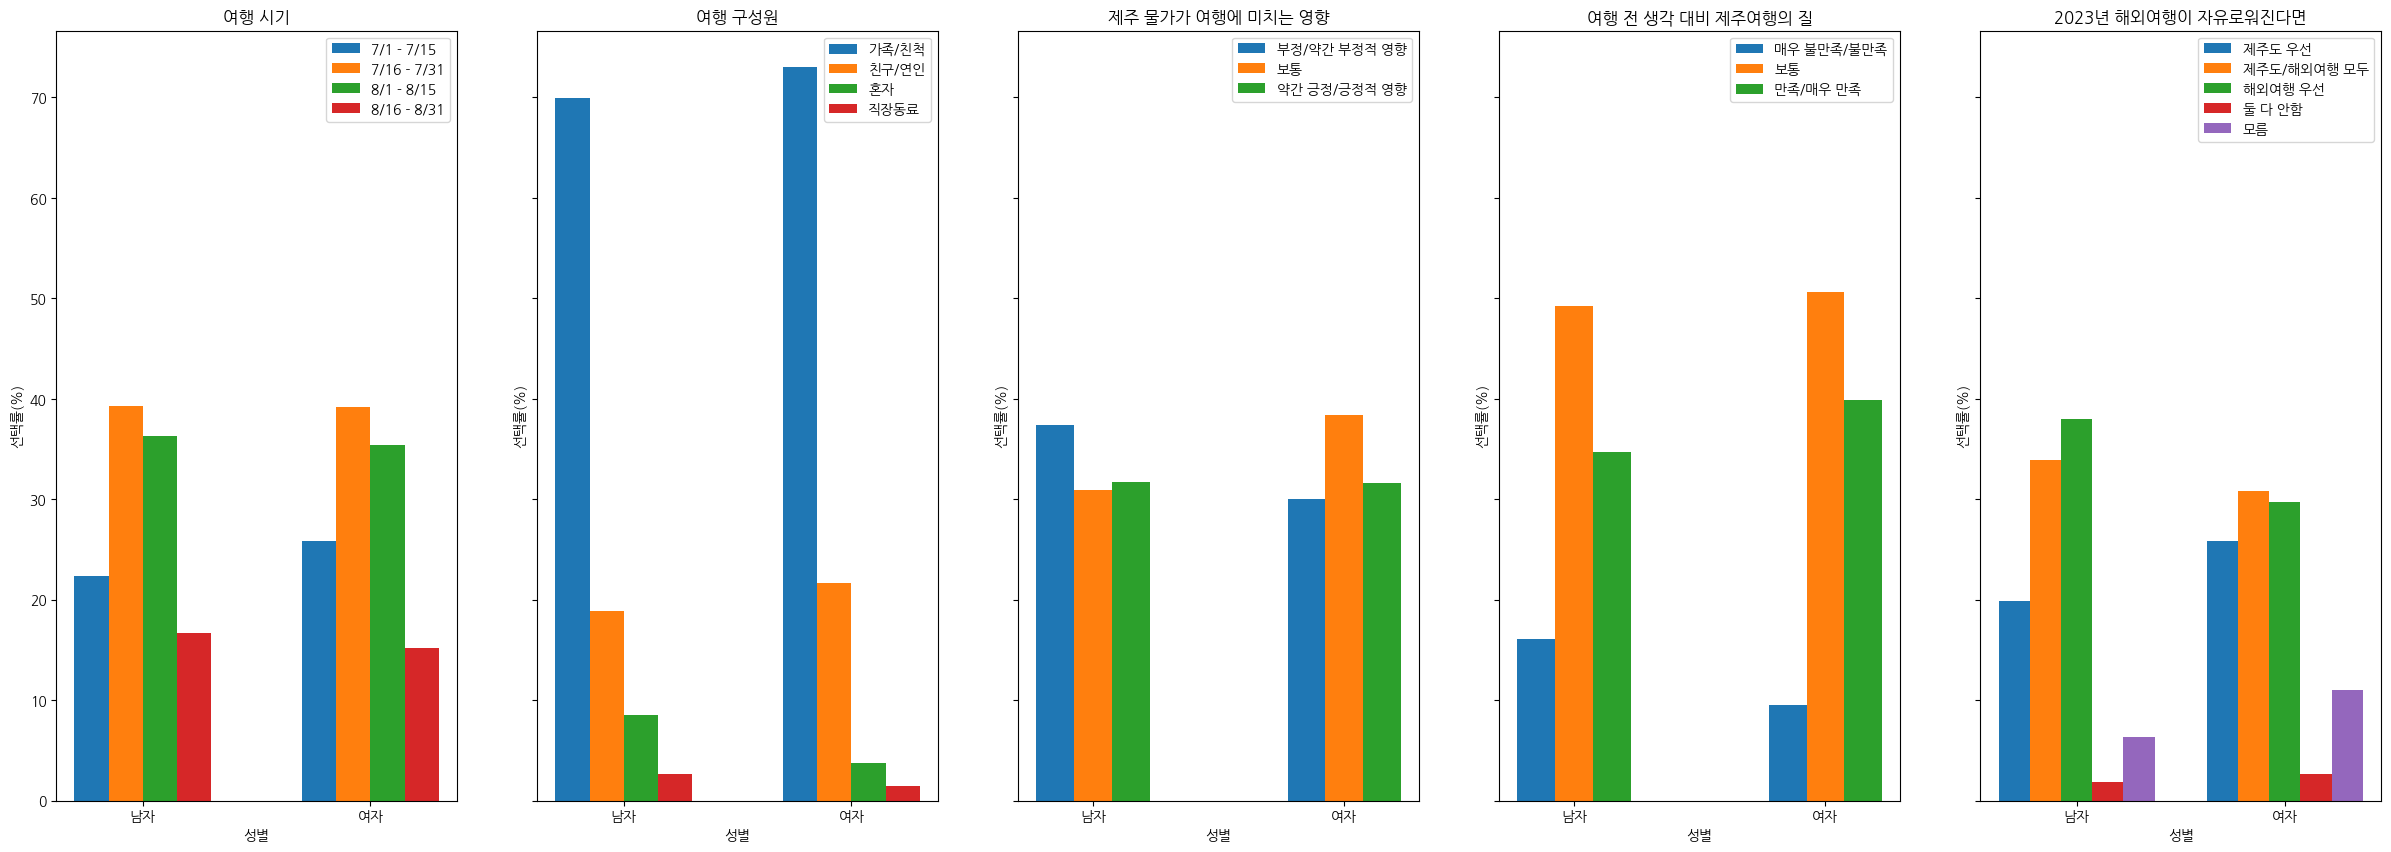

In [5]:
# 성별 시각화
gender_when = af_result1.loc[1:2, ['7월 전반(~7/15)',	'7월 후반(~7/31)',	'8월 전반(~8/15)',	'8월 후반(~8/31)']]
gender_with = af_result1.loc[1:2, ['가족/친척',	'친구/연인',	'혼자', '직장동료']]
gender_effect = af_result1.loc[1:2, ['부정/약간 부정',	'보통_x',	'긍정/약간 긍정']]
gender_satis = af_result1.loc[1:2, ['매우 불만족/불만족',	'보통_y',	'만족/매우 만족']]
gender_ifgo = af_result1.loc[1:2, ['제주도 우선',	'제주도/해외여행 모두',	'해외여행 우선',	'둘 다 안함',	'모름']]

fig, ax = plt.subplots(1, 5, sharey=True, figsize=(30, 10))
x_labels = ['남자', '여자']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
ax[0].bar(index - 1.5 * bar_width, gender_when['7월 전반(~7/15)'], bar_width, label='7/1 - 7/15')
ax[0].bar(index - 0.5 * bar_width, gender_when['7월 후반(~7/31)'], bar_width, label='7/16 - 7/31')
ax[0].bar(index + 0.5 * bar_width, gender_when['8월 전반(~8/15)'], bar_width, label='8/1 - 8/15')
ax[0].bar(index + 1.5 * bar_width, gender_when['8월 후반(~8/31)'], bar_width, label='8/16 - 8/31')
ax[0].set_title('여행 시기')
ax[0].set_xlabel('성별')
ax[0].set_ylabel('선택률(%)')
ax[0].set_xticks(index)
ax[0].set_xticklabels(x_labels)
ax[0].legend()

# 서브플롯2
ax[1].bar(index - 1.5 * bar_width, gender_with['가족/친척'], bar_width, label='가족/친척')
ax[1].bar(index - 0.5 * bar_width, gender_with['친구/연인'], bar_width, label='친구/연인')
ax[1].bar(index + 0.5 * bar_width, gender_with['혼자'], bar_width, label='혼자')
ax[1].bar(index + 1.5 * bar_width, gender_with['직장동료'], bar_width, label='직장동료')
ax[1].set_title('여행 구성원')
ax[1].set_xlabel('성별')
ax[1].set_ylabel('선택률(%)')
ax[1].set_xticks(index)
ax[1].set_xticklabels(x_labels)
ax[1].legend()

# 서브플롯 3
ax[2].bar(index - bar_width, gender_effect['부정/약간 부정'], bar_width, label='부정/약간 부정적 영향')
ax[2].bar(index, gender_effect['보통_x'], bar_width, label='보통')
ax[2].bar(index + bar_width, gender_effect['긍정/약간 긍정'], bar_width, label='약간 긍정/긍정적 영향')
ax[2].set_title('제주 물가가 여행에 미치는 영향')
ax[2].set_xlabel('성별')
ax[2].set_ylabel('선택률(%)')
ax[2].set_xticks(index)
ax[2].set_xticklabels(x_labels)
ax[2].legend()

# 서브플롯 4
ax[3].bar(index - bar_width, gender_satis['매우 불만족/불만족'], bar_width, label='매우 불만족/불만족')
ax[3].bar(index, gender_satis['보통_y'], bar_width, label='보통')
ax[3].bar(index + bar_width, gender_satis['만족/매우 만족'], bar_width, label='만족/매우 만족')
ax[3].set_title('여행 전 생각 대비 제주여행의 질')
ax[3].set_xlabel('성별')
ax[3].set_ylabel('선택률(%)')
ax[3].set_xticks(index)
ax[3].set_xticklabels(x_labels)
ax[3].legend()

# 서브플롯 5
ax[4].bar(index - 2 * bar_width, gender_ifgo['제주도 우선'], bar_width, label='제주도 우선')
ax[4].bar(index - bar_width, gender_ifgo['제주도/해외여행 모두'], bar_width, label='제주도/해외여행 모두')
ax[4].bar(index, gender_ifgo['해외여행 우선'], bar_width, label='해외여행 우선')
ax[4].bar(index + bar_width, gender_ifgo['둘 다 안함'], bar_width, label='둘 다 안함')
ax[4].bar(index + 2 * bar_width, gender_ifgo['모름'], bar_width, label='모름')
ax[4].set_title('2023년 해외여행이 자유로워진다면')
ax[4].set_xlabel('성별')
ax[4].set_ylabel('선택률(%)')
ax[4].set_xticks(index)
ax[4].set_xticklabels(x_labels)
ax[4].legend()


### 연령 시각화 - 제주도 여행을 실제로 한 사람들 기준

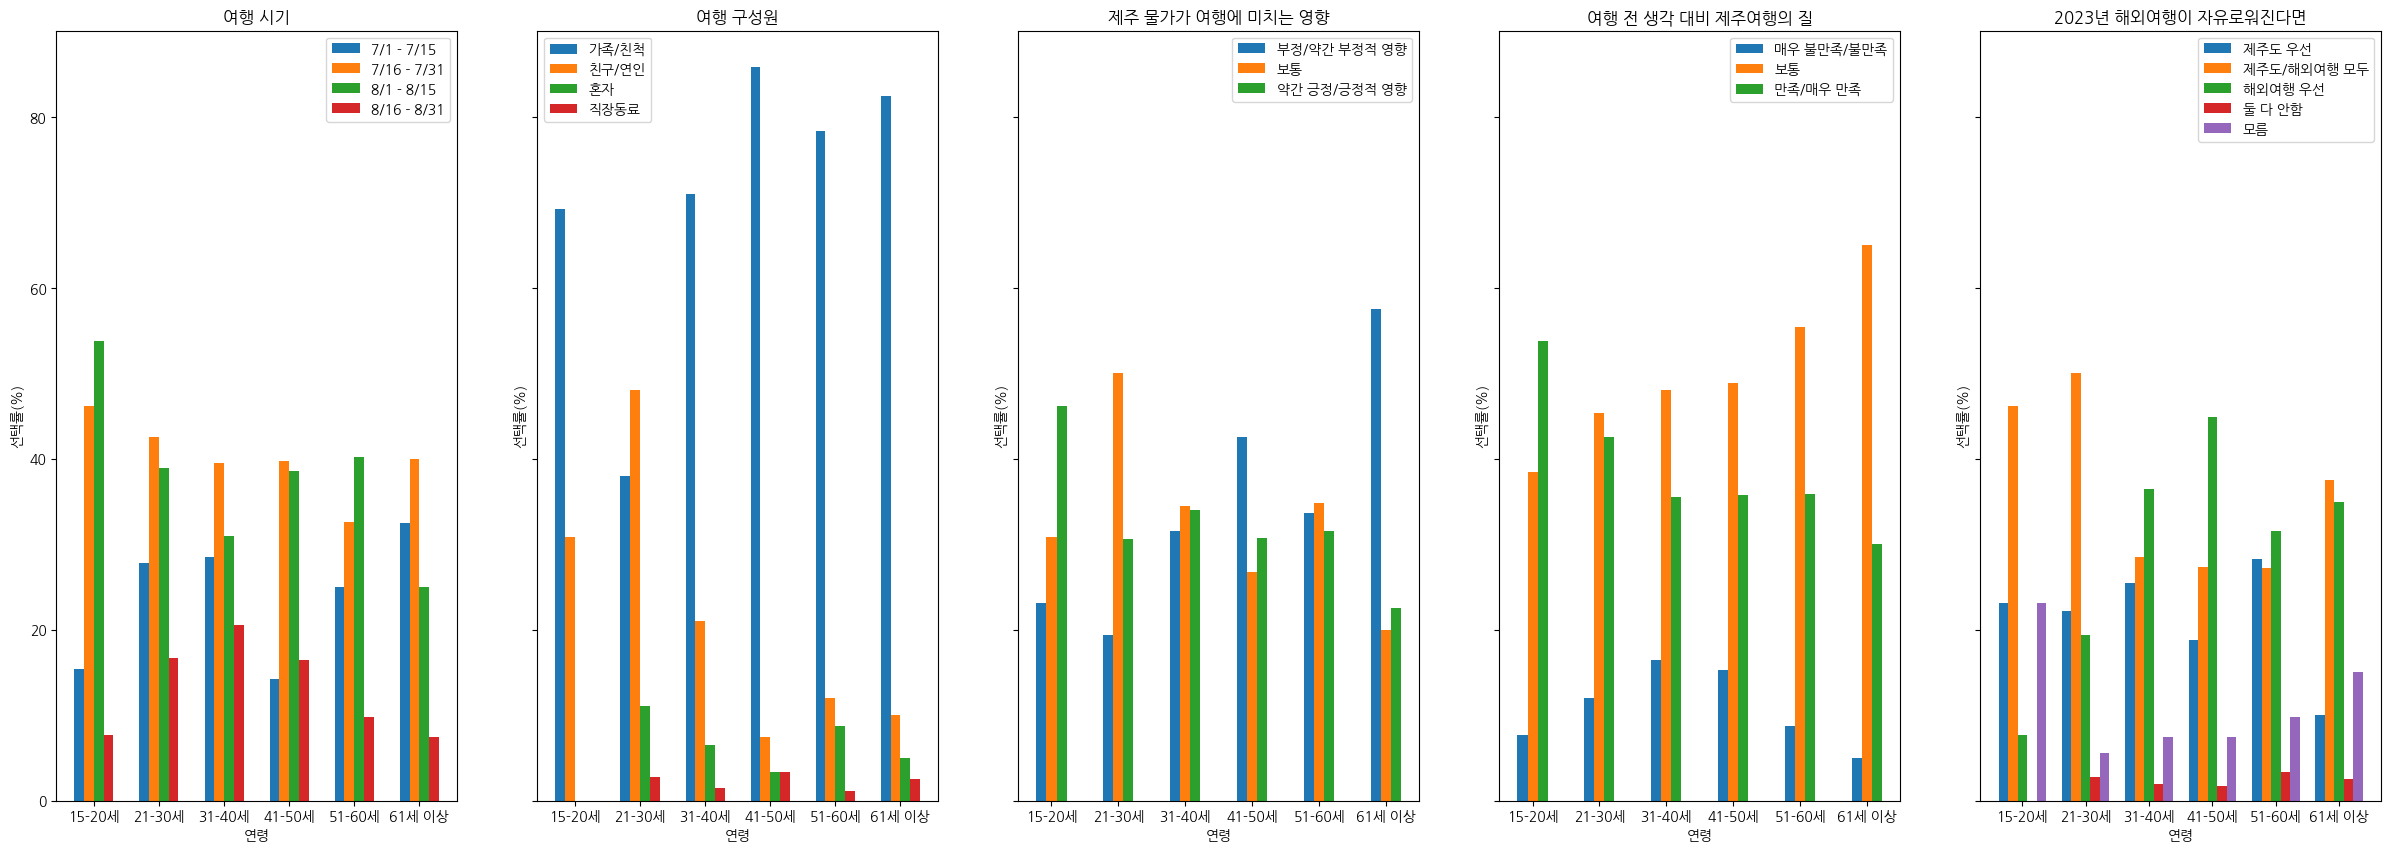

In [6]:
# 연령 시각화
age_when = af_result1.loc[3:8, ['7월 전반(~7/15)',	'7월 후반(~7/31)',	'8월 전반(~8/15)',	'8월 후반(~8/31)']]
age_with = af_result1.loc[3:8, ['가족/친척',	'친구/연인',	'혼자', '직장동료']]
age_effect = af_result1.loc[3:8, ['부정/약간 부정',	'보통_x',	'긍정/약간 긍정']]
age_satis = af_result1.loc[3:8, ['매우 불만족/불만족',	'보통_y',	'만족/매우 만족']]
age_ifgo = af_result1.loc[3:8, ['제주도 우선',	'제주도/해외여행 모두',	'해외여행 우선',	'둘 다 안함',	'모름']]

fig, ax = plt.subplots(1, 5, sharey=True, figsize=(30, 10))
x_labels = ['15-20세', '21-30세', '31-40세', '41-50세', '51-60세', '61세 이상']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
ax[0].bar(index - 1.5 * bar_width, age_when['7월 전반(~7/15)'], bar_width, label='7/1 - 7/15')
ax[0].bar(index - 0.5 * bar_width, age_when['7월 후반(~7/31)'], bar_width, label='7/16 - 7/31')
ax[0].bar(index + 0.5 * bar_width, age_when['8월 전반(~8/15)'], bar_width, label='8/1 - 8/15')
ax[0].bar(index + 1.5 * bar_width, age_when['8월 후반(~8/31)'], bar_width, label='8/16 - 8/31')
ax[0].set_title('여행 시기')
ax[0].set_xlabel('연령')
ax[0].set_ylabel('선택률(%)')
ax[0].set_xticks(index)
ax[0].set_xticklabels(x_labels)
ax[0].legend()

# 서브플롯2
ax[1].bar(index - 1.5 * bar_width, age_with['가족/친척'], bar_width, label='가족/친척')
ax[1].bar(index - 0.5 * bar_width, age_with['친구/연인'], bar_width, label='친구/연인')
ax[1].bar(index + 0.5 * bar_width, age_with['혼자'], bar_width, label='혼자')
ax[1].bar(index + 1.5 * bar_width, age_with['직장동료'], bar_width, label='직장동료')
ax[1].set_title('여행 구성원')
ax[1].set_xlabel('연령')
ax[1].set_ylabel('선택률(%)')
ax[1].set_xticks(index)
ax[1].set_xticklabels(x_labels)
ax[1].legend()

# 서브플롯 3
ax[2].bar(index - bar_width, age_effect['부정/약간 부정'], bar_width, label='부정/약간 부정적 영향')
ax[2].bar(index, age_effect['보통_x'], bar_width, label='보통')
ax[2].bar(index + bar_width, age_effect['긍정/약간 긍정'], bar_width, label='약간 긍정/긍정적 영향')
ax[2].set_title('제주 물가가 여행에 미치는 영향')
ax[2].set_xlabel('연령')
ax[2].set_ylabel('선택률(%)')
ax[2].set_xticks(index)
ax[2].set_xticklabels(x_labels)
ax[2].legend()

# 서브플롯 4
ax[3].bar(index - bar_width, age_satis['매우 불만족/불만족'], bar_width, label='매우 불만족/불만족')
ax[3].bar(index, age_satis['보통_y'], bar_width, label='보통')
ax[3].bar(index + bar_width, age_satis['만족/매우 만족'], bar_width, label='만족/매우 만족')
ax[3].set_title('여행 전 생각 대비 제주여행의 질')
ax[3].set_xlabel('연령')
ax[3].set_ylabel('선택률(%)')
ax[3].set_xticks(index)
ax[3].set_xticklabels(x_labels)
ax[3].legend()

# 서브플롯 5
ax[4].bar(index - 2 * bar_width, age_ifgo['제주도 우선'], bar_width, label='제주도 우선')
ax[4].bar(index - bar_width, age_ifgo['제주도/해외여행 모두'], bar_width, label='제주도/해외여행 모두')
ax[4].bar(index, age_ifgo['해외여행 우선'], bar_width, label='해외여행 우선')
ax[4].bar(index + bar_width, age_ifgo['둘 다 안함'], bar_width, label='둘 다 안함')
ax[4].bar(index + 2 * bar_width, age_ifgo['모름'], bar_width, label='모름')
ax[4].set_title('2023년 해외여행이 자유로워진다면')
ax[4].set_xlabel('연령')
ax[4].set_ylabel('선택률(%)')
ax[4].set_xticks(index)
ax[4].set_xticklabels(x_labels)
ax[4].legend()

### 가구소득 시각화 - 제주도 여행을 실제로 한 사람들 기준
- 참고 : 2022년 4분기 기준 월평균 소득은 483만4천 원
> 출처 : https://www.sedaily.com/NewsView/29LVI9V4ER

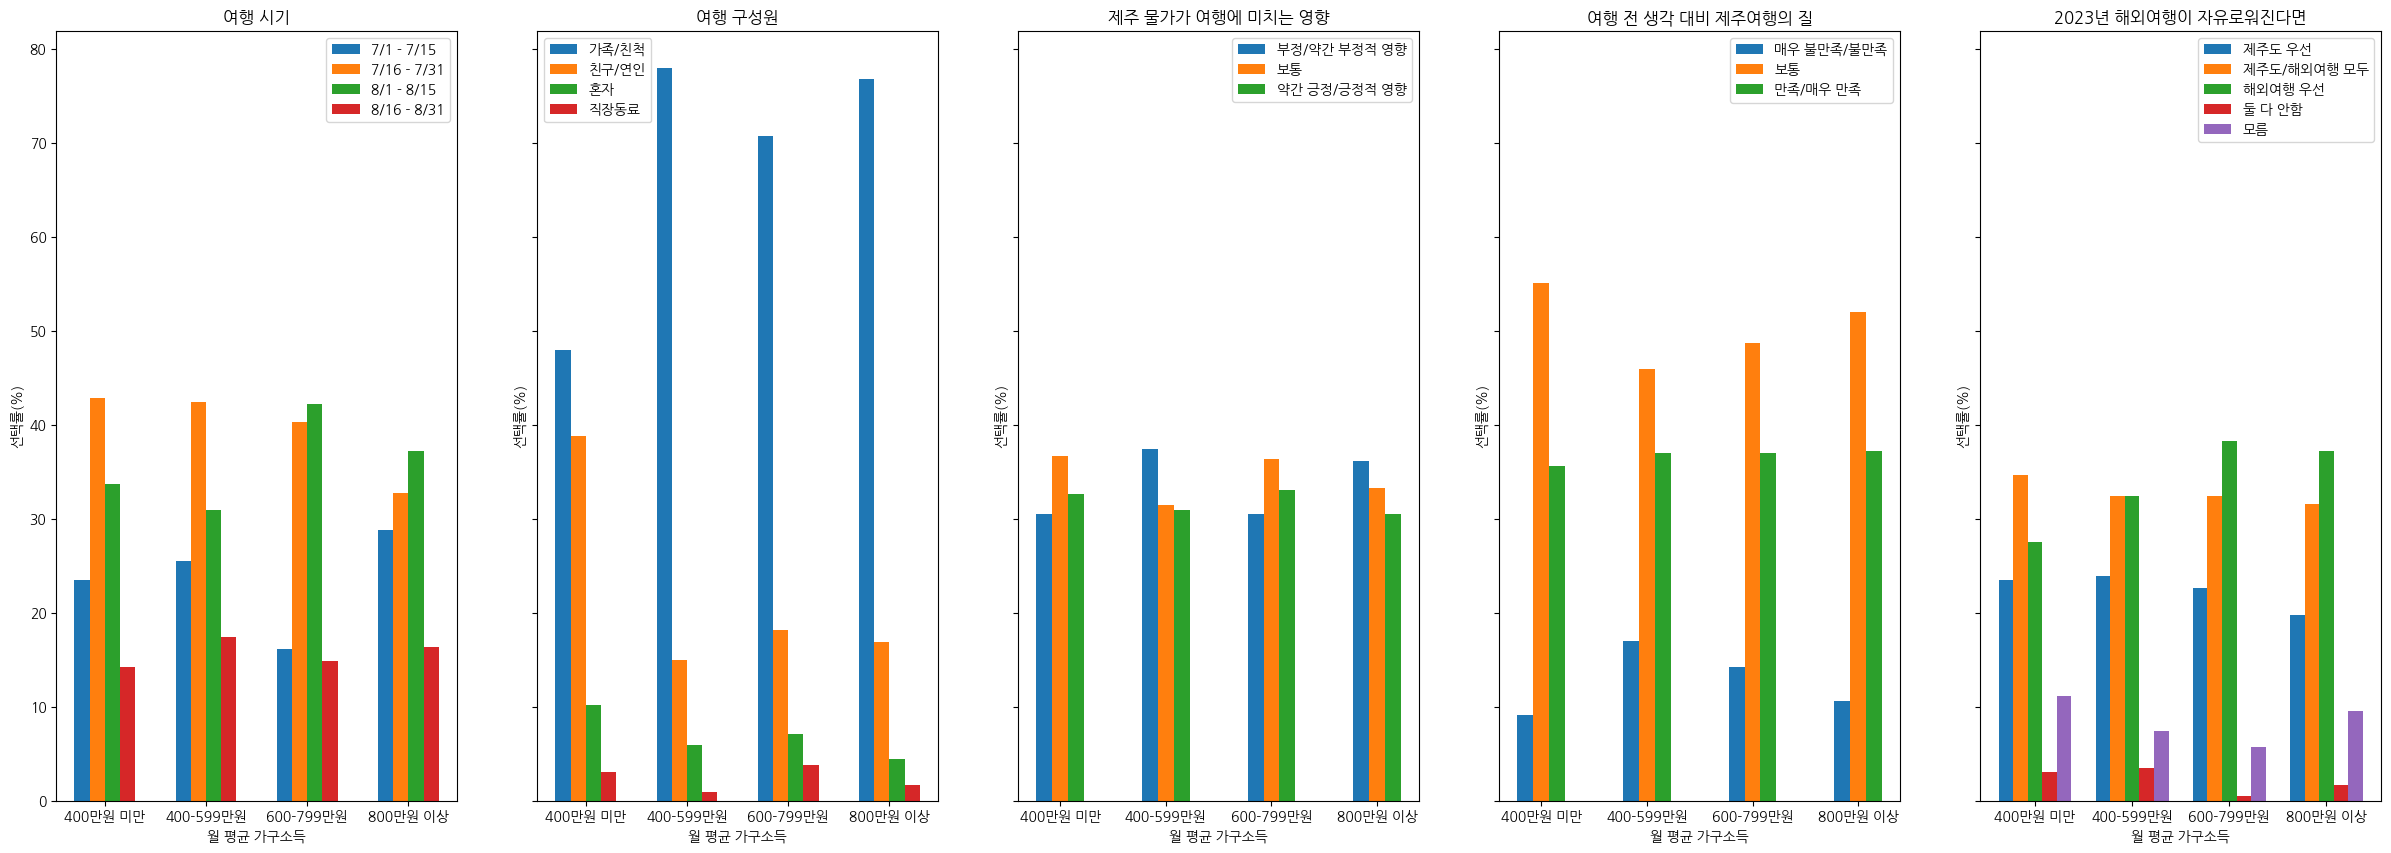

In [7]:
# 가구소득 시각화
income_when = af_result1.loc[9:, ['7월 전반(~7/15)',	'7월 후반(~7/31)',	'8월 전반(~8/15)',	'8월 후반(~8/31)']]
income_with = af_result1.loc[9:, ['가족/친척',	'친구/연인',	'혼자', '직장동료']]
income_effect = af_result1.loc[9:, ['부정/약간 부정',	'보통_x',	'긍정/약간 긍정']]
income_satis = af_result1.loc[9:, ['매우 불만족/불만족',	'보통_y',	'만족/매우 만족']]
income_ifgo = af_result1.loc[9:, ['제주도 우선',	'제주도/해외여행 모두',	'해외여행 우선',	'둘 다 안함',	'모름']]

fig, ax = plt.subplots(1, 5, sharey=True, figsize=(30, 10))
x_labels = ['400만원 미만', '400-599만원', '600-799만원', '800만원 이상']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
ax[0].bar(index - 1.5 * bar_width, income_when['7월 전반(~7/15)'], bar_width, label='7/1 - 7/15')
ax[0].bar(index - 0.5 * bar_width, income_when['7월 후반(~7/31)'], bar_width, label='7/16 - 7/31')
ax[0].bar(index + 0.5 * bar_width, income_when['8월 전반(~8/15)'], bar_width, label='8/1 - 8/15')
ax[0].bar(index + 1.5 * bar_width, income_when['8월 후반(~8/31)'], bar_width, label='8/16 - 8/31')
ax[0].set_title('여행 시기')
ax[0].set_xlabel('월 평균 가구소득')
ax[0].set_ylabel('선택률(%)')
ax[0].set_xticks(index)
ax[0].set_xticklabels(x_labels)
ax[0].legend()

# 서브플롯2
ax[1].bar(index - 1.5 * bar_width, income_with['가족/친척'], bar_width, label='가족/친척')
ax[1].bar(index - 0.5 * bar_width, income_with['친구/연인'], bar_width, label='친구/연인')
ax[1].bar(index + 0.5 * bar_width, income_with['혼자'], bar_width, label='혼자')
ax[1].bar(index + 1.5 * bar_width, income_with['직장동료'], bar_width, label='직장동료')
ax[1].set_title('여행 구성원')
ax[1].set_xlabel('월 평균 가구소득')
ax[1].set_ylabel('선택률(%)')
ax[1].set_xticks(index)
ax[1].set_xticklabels(x_labels)
ax[1].legend()

# 서브플롯 3
ax[2].bar(index - bar_width, income_effect['부정/약간 부정'], bar_width, label='부정/약간 부정적 영향')
ax[2].bar(index, income_effect['보통_x'], bar_width, label='보통')
ax[2].bar(index + bar_width, income_effect['긍정/약간 긍정'], bar_width, label='약간 긍정/긍정적 영향')
ax[2].set_title('제주 물가가 여행에 미치는 영향')
ax[2].set_xlabel('월 평균 가구소득')
ax[2].set_ylabel('선택률(%)')
ax[2].set_xticks(index)
ax[2].set_xticklabels(x_labels)
ax[2].legend()

# 서브플롯 4
ax[3].bar(index - bar_width, income_satis['매우 불만족/불만족'], bar_width, label='매우 불만족/불만족')
ax[3].bar(index, income_satis['보통_y'], bar_width, label='보통')
ax[3].bar(index + bar_width, income_satis['만족/매우 만족'], bar_width, label='만족/매우 만족')
ax[3].set_title('여행 전 생각 대비 제주여행의 질')
ax[3].set_xlabel('월 평균 가구소득')
ax[3].set_ylabel('선택률(%)')
ax[3].set_xticks(index)
ax[3].set_xticklabels(x_labels)
ax[3].legend()

# 서브플롯 5
ax[4].bar(index - 2 * bar_width, income_ifgo['제주도 우선'], bar_width, label='제주도 우선')
ax[4].bar(index - bar_width, income_ifgo['제주도/해외여행 모두'], bar_width, label='제주도/해외여행 모두')
ax[4].bar(index, income_ifgo['해외여행 우선'], bar_width, label='해외여행 우선')
ax[4].bar(index + bar_width, income_ifgo['둘 다 안함'], bar_width, label='둘 다 안함')
ax[4].bar(index + 2 * bar_width, income_ifgo['모름'], bar_width, label='모름')
ax[4].set_title('2023년 해외여행이 자유로워진다면')
ax[4].set_xlabel('월 평균 가구소득')
ax[4].set_ylabel('선택률(%)')
ax[4].set_xticks(index)
ax[4].set_xticklabels(x_labels)
ax[4].legend()

## 여행과 관련한 세부질문

In [8]:
af_result2 = pd.read_csv(DATA_PATH + '2022_af_result7.csv')
af_result2

,분류,세부분류,사례수,성산일출봉-섭지코지 인근 (성산읍),중문관광단지,용담 해안도로 인근 (제주시),곽지-한담해변 (애월읍),함덕해변 (조천읍),이중섭 거리/서귀포 올레시장,협재-금릉해변 (한림읍),...,모텔,친구/친척집_x,캠핑/글램핑,유명 맛집(검색/소개),숙박시설과 가까운 식당,숙박시설 내 식당,사람이 거의 없는 식당,친구/친척집_y,포장/배달(도시락 등),직접 요리
0,전체,NaN,629,59.9,45.0,43.4,34.5,33.7,32.6,31.2,...,2.9,2.5,1.1,64.7,24.3,6.7,1.6,1.3,0.6,0.8
1,성별,남자,366,62.3,48.1,42.6,32.8,31.7,30.1,29.2,...,3.3,2.5,0.5,67.8,22.7,5.5,1.9,1.1,0.3,0.8
2,성별,여자,263,56.7,40.7,44.5,36.9,36.5,36.1,33.8,...,2.3,2.7,1.9,60.5,26.6,8.4,1.1,1.5,1.1,0.8
3,연령,15~20세,13,46.2,38.5,38.5,38.5,7.7,46.2,15.4,...,7.7,0.0,7.7,76.9,7.7,0.0,15.4,0.0,0.0,0.0
4,연령,21~30세,108,53.7,37.0,45.4,36.1,33.3,44.4,38.0,...,5.6,1.9,1.9,60.2,25.9,7.4,2.8,0.0,1.9,1.9
5,연령,31~40세,200,57.0,45.5,46.5,33.5,37.0,29.0,32.5,...,2.5,1.0,0.5,66.5,23.5,7.5,0.0,0.5,1.0,1.0
6,연령,41~50세,176,61.4,48.9,44.9,34.1,37.5,29.0,29.5,...,1.7,5.1,1.1,67.6,21.0,6.8,1.1,3.4,0.0,0.0
7,연령,51~60세,92,71.7,47.8,34.8,39.1,27.2,31.5,32.6,...,3.3,2.2,1.1,67.4,25.0,4.3,1.1,1.1,0.0,1.1
8,연령,61세 이상,40,62.5,42.5,37.5,25.0,25.0,32.5,15.0,...,0.0,2.5,0.0,45.0,42.5,7.5,5.0,0.0,0.0,0.0
9,월 평균 가구소득,400만원 미만,98,42.9,34.7,33.7,37.8,22.4,23.5,31.6,...,9.2,2.0,2.0,57.1,31.6,5.1,1.0,0.0,2.0,3.1


### 성별시각화 - 여행과 관련한 세부 질문

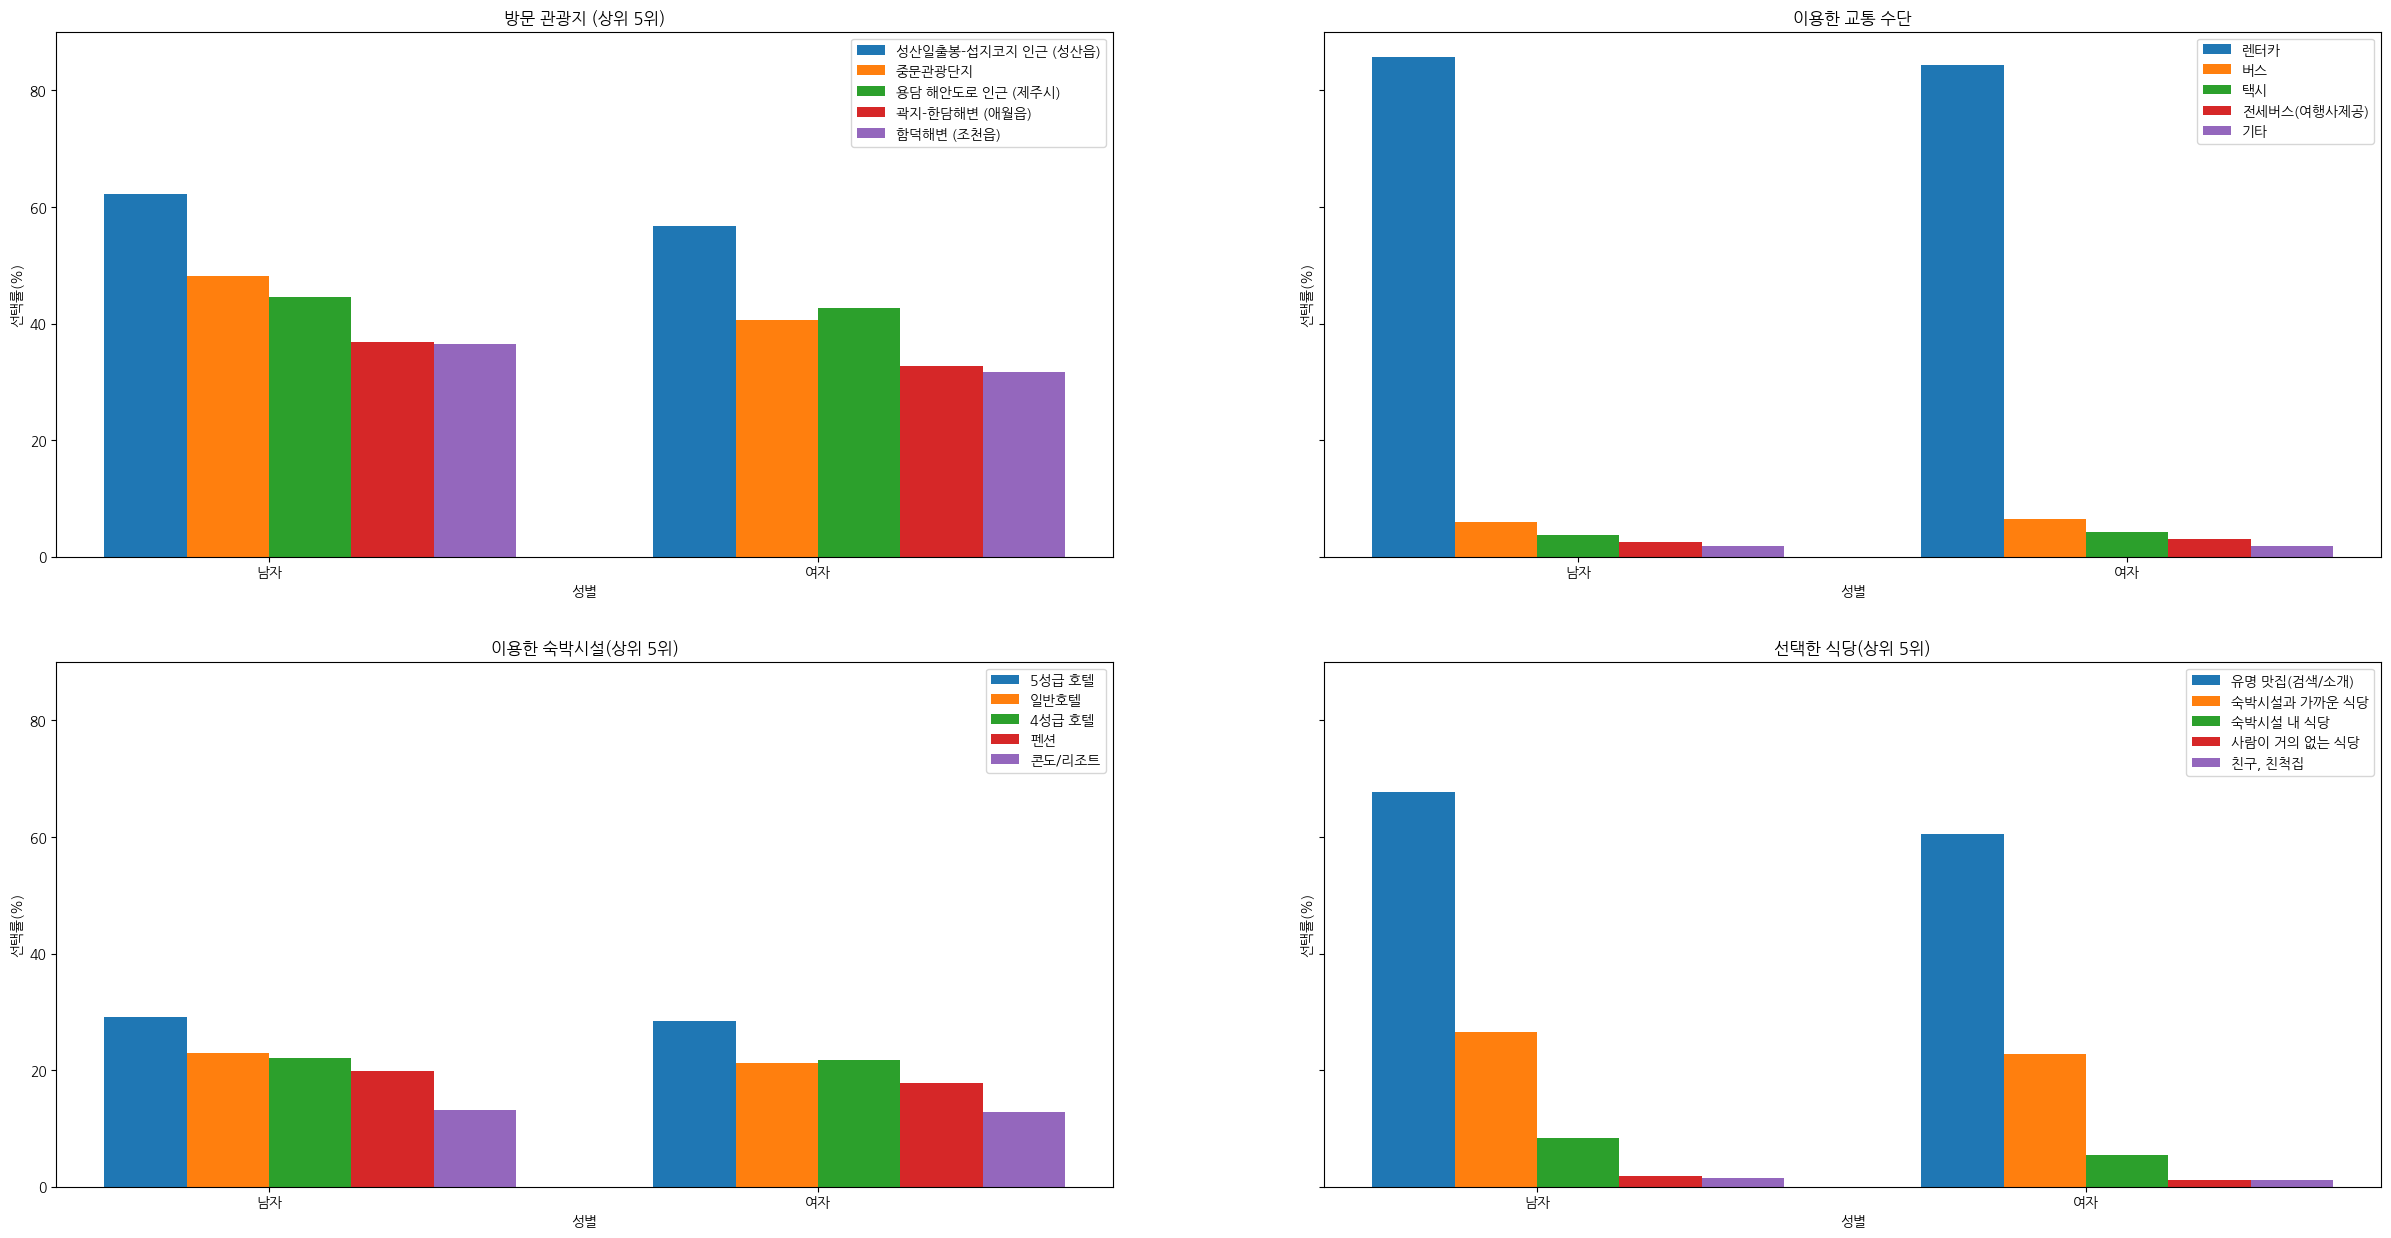

In [56]:
gender_where = af_result2.loc[1:2, ['성산일출봉-섭지코지 인근 (성산읍)',	'중문관광단지',	'용담 해안도로 인근 (제주시)',	'곽지-한담해변 (애월읍)',	'함덕해변 (조천읍)',
                                    '이중섭 거리/서귀포 올레시장',	'협재-금릉해변 (한림읍)',	'오름/한라산',	'표선해변 (표선면)',	'월정-세화해변 (구좌읍)',	'우도',
                                    '마을관광(저지리, 가시리 등)',	'기타1',	'기타2']]
gender_traffic = af_result2.loc[1:2, ['렌터카',	'버스',	'택시',	'전세버스(여행사제공)',	'기타']]
gender_accom = af_result2.loc[1:2, ['5성급 호텔',	'일반호텔',	'4성급 호텔',	'펜션',	'콘도/리조트',	'게스트하우스/호스텔',	'모텔',	'친구/친척집_x',	'캠핑/글램핑']]
gender_rest = af_result2.loc[1:2, ['유명 맛집(검색/소개)',	'숙박시설과 가까운 식당',	'숙박시설 내 식당',	'사람이 거의 없는 식당',	'친구/친척집_y',	'포장/배달(도시락 등)',	'직접 요리']]

fig, ax = plt.subplots(2, 2, sharey=True, figsize=(30, 15))
x_labels = ['남자', '여자']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
sorted_data_gwh = {k: sorted(v, reverse=True)[:5] for k, v in gender_where.items()}
for i, label in enumerate(list(sorted_data_gwh.keys())[:5]):
    ax[0, 0].bar(index + i * bar_width, sorted_data_gwh[label], bar_width, label=label)
ax[0, 0].set_xticks(index + (4 - 1) * bar_width / 2)
ax[0, 0].set_xticklabels(x_labels)
ax[0, 0].set_title('방문 관광지 (상위 5위)')
ax[0, 0].set_xlabel('성별')
ax[0, 0].set_ylabel('선택률(%)')
ax[0, 0].legend()

# 서브플롯2
ax[0, 1].bar(index - 2 * bar_width, gender_traffic['렌터카'], bar_width, label='렌터카')
ax[0, 1].bar(index - bar_width, gender_traffic['버스'], bar_width, label='버스')
ax[0, 1].bar(index, gender_traffic['택시'], bar_width, label='택시')
ax[0, 1].bar(index + bar_width, gender_traffic['전세버스(여행사제공)'], bar_width, label='전세버스(여행사제공)')
ax[0, 1].bar(index + 2 * bar_width, gender_traffic['기타'], bar_width, label='기타')
ax[0, 1].set_title('이용한 교통 수단')
ax[0, 1].set_xlabel('성별')
ax[0, 1].set_ylabel('선택률(%)')
ax[0, 1].set_xticks(index)
ax[0, 1].set_xticklabels(x_labels)
ax[0, 1].legend()

# 서브플롯 3
sorted_data_gacc = {t: sorted(f, reverse=True)[:5] for t, f in gender_accom.items()}
for g, label in enumerate(list(sorted_data_gacc.keys())[:5]):
    ax[1, 0].bar(index + g * bar_width, sorted_data_gacc[label], bar_width, label=label)
ax[1, 0].set_xticks(index + (4 - 1) * bar_width / 2)
ax[1, 0].set_xticklabels(x_labels)
ax[1, 0].set_title('이용한 숙박시설(상위 5위)')
ax[1, 0].set_xlabel('성별')
ax[1, 0].set_ylabel('선택률(%)')
ax[1, 0].legend()

# 서브플롯 4
sorted_data_grest = {r: sorted(d, reverse=True)[:5] for r, d in gender_rest.items()}
for w, label in enumerate(list(sorted_data_grest.keys())[:5]):
    if label == '친구/친척집_y':
        ax[1, 1].bar(index + w * bar_width, sorted_data_grest[label], bar_width, label='친구, 친척집')
    else:
        ax[1, 1].bar(index + w * bar_width, sorted_data_grest[label], bar_width, label=label)

ax[1, 1].set_xticks(index + (4 - 1) * bar_width / 2)
ax[1, 1].set_title('선택한 식당(상위 5위)')
ax[1, 1].set_xlabel('성별')
ax[1, 1].set_ylabel('선택률(%)')
ax[1, 1].set_xticklabels(x_labels)
ax[1, 1].legend()

KeyError: ignored

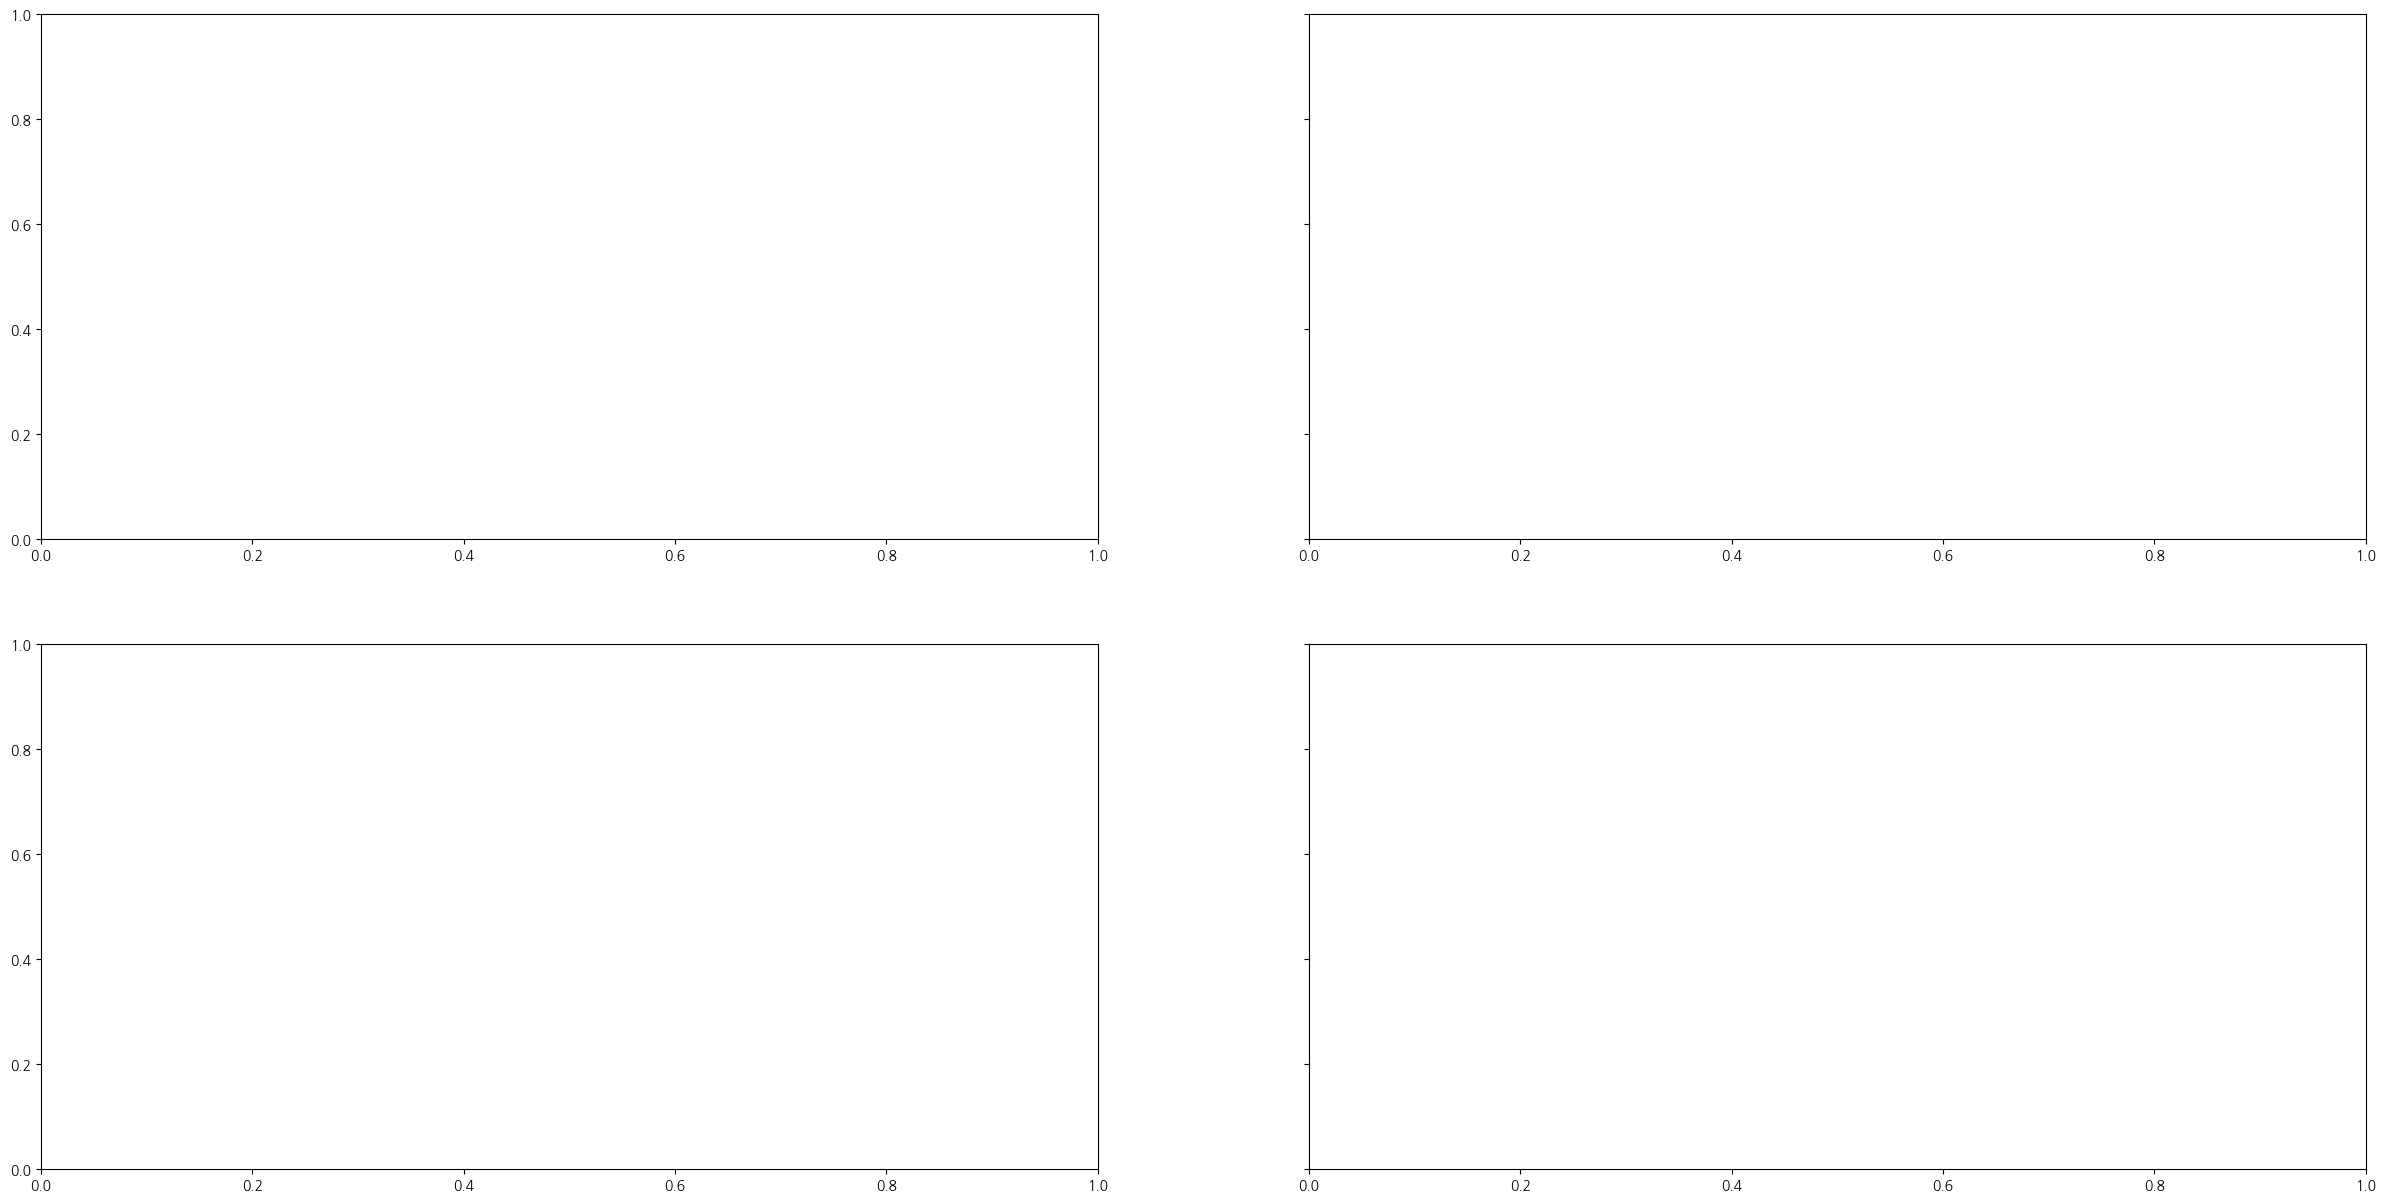

In [67]:
'''age_where = af_result2.loc[3:8, ['성산일출봉-섭지코지 인근 (성산읍)',	'중문관광단지',	'용담 해안도로 인근 (제주시)',	'곽지-한담해변 (애월읍)',	'함덕해변 (조천읍)',
                                    '이중섭 거리/서귀포 올레시장',	'협재-금릉해변 (한림읍)',	'오름/한라산',	'표선해변 (표선면)',	'월정-세화해변 (구좌읍)',	'우도',
                                    '마을관광(저지리, 가시리 등)',	'기타1',	'기타2']]
age_traffic = af_result2.loc[3:8, ['렌터카',	'버스',	'택시',	'전세버스(여행사제공)',	'기타']]
age_accom = af_result2.loc[3:8, ['5성급 호텔',	'일반호텔',	'4성급 호텔',	'펜션',	'콘도/리조트',	'게스트하우스/호스텔',	'모텔',	'친구/친척집_x',	'캠핑/글램핑']]
age_rest = af_result2.loc[3:8, ['유명 맛집(검색/소개)',	'숙박시설과 가까운 식당',	'숙박시설 내 식당',	'사람이 거의 없는 식당',	'친구/친척집_y',	'포장/배달(도시락 등)',	'직접 요리']]

fig, ax = plt.subplots(2, 2, sharey=True, figsize=(30, 15))
x_labels = ['15~20세', '21~30세', '31~40세', '41~50세', '51~60세', '61세 이상']

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 서브플롯1
# 데이터 정렬
sorted_data_awh = {age: sorted(age_where[x_labels], reverse=True)[:5] for age in x_labels}

# 그래프 그리기
for i, label in enumerate(list(sorted_data_awh.keys())[:5]):
    ax[0, 0].bar(index + i * bar_width, sorted_data_awh[label], bar_width, label=label)
ax[0, 0].set_xticks(index + (4 - 1) * bar_width / 2)
ax[0, 0].set_xticklabels(x_labels)
ax[0, 0].set_title('방문 관광지 (상위 5위)')
ax[0, 0].set_xlabel('연령')
ax[0, 0].set_ylabel('선택률(%)')
ax[0, 0].legend()

# 서브플롯2
ax[0, 1].bar(index - 2 * bar_width, age_traffic['렌터카'], bar_width, label='렌터카')
ax[0, 1].bar(index - bar_width, age_traffic['버스'], bar_width, label='버스')
ax[0, 1].bar(index, age_traffic['택시'], bar_width, label='택시')
ax[0, 1].bar(index + bar_width, age_traffic['전세버스(여행사제공)'], bar_width, label='전세버스(여행사제공)')
ax[0, 1].bar(index + 2 * bar_width, age_traffic['기타'], bar_width, label='기타')
ax[0, 1].set_title('이용한 교통 수단')
ax[0, 1].set_xlabel('연령')
ax[0, 1].set_ylabel('선택률(%)')
ax[0, 1].set_xticks(index)
ax[0, 1].set_xticklabels(x_labels)
ax[0, 1].legend()

# 서브플롯 3
sorted_data_aacc = {t: sorted(f, reverse=True)[:5] for t, f in age_accom.items()}
for g, label in enumerate(list(sorted_data_aacc.keys())[:5]):
    ax[1, 0].bar(index + g * bar_width, sorted_data_aacc[label], bar_width, label=label)
ax[1, 0].set_xticks(index + (4 - 1) * bar_width / 2)
ax[1, 0].set_xticklabels(x_labels)
ax[1, 0].set_title('이용한 숙박시설(상위 5위)')
ax[1, 0].set_xlabel('연령')
ax[1, 0].set_ylabel('선택률(%)')
ax[1, 0].legend()

# 서브플롯 4
sorted_data_arest = {r: sorted(d, reverse=True)[:5] for r, d in age_rest.items()}
for w, label in enumerate(list(sorted_data_arest.keys())[:5]):
    if label == '친구/친척집_y':
        ax[1, 1].bar(index + w * bar_width, sorted_data_arest[label], bar_width, label='친구, 친척집')
    else:
        ax[1, 1].bar(index + w * bar_width, sorted_data_arest[label], bar_width, label=label)

ax[1, 1].set_xticks(index + (4 - 1) * bar_width / 2)
ax[1, 1].set_title('선택한 식당(상위 5위)')
ax[1, 1].set_xlabel('연령')
ax[1, 1].set_ylabel('선택률(%)')
ax[1, 1].set_xticklabels(x_labels)
ax[1, 1].legend()

{'15~20세': [('성산일출봉-섭지코지 인근 (성산읍)', 46.2), ('이중섭 거리/서귀포 올레시장', 46.2), ('중문관광단지', 38.5), ('용담 해안도로 인근 (제주시)', 38.5), ('곽지-한담해변 (애월읍)', 38.5)], '21~30세': [('성산일출봉-섭지코지 인근 (성산읍)', 53.7), ('용담 해안도로 인근 (제주시)', 45.4), ('이중섭 거리/서귀포 올레시장', 44.4), ('협재-금릉해변 (한림읍)', 38.0), ('중문관광단지', 37.0)], '31~40세': [('성산일출봉-섭지코지 인근 (성산읍)', 57.0), ('용담 해안도로 인근 (제주시)', 46.5), ('중문관광단지', 45.5), ('함덕해변 (조천읍)', 37.0), ('곽지-한담해변 (애월읍)', 33.5)], '41~50세': [('성산일출봉-섭지코지 인근 (성산읍)', 61.4), ('중문관광단지', 48.9), ('용담 해안도로 인근 (제주시)', 44.9), ('함덕해변 (조천읍)', 37.5), ('곽지-한담해변 (애월읍)', 34.1)], '51~60세': [('성산일출봉-섭지코지 인근 (성산읍)', 71.7), ('중문관광단지', 47.8), ('곽지-한담해변 (애월읍)', 39.1), ('용담 해안도로 인근 (제주시)', 34.8), ('협재-금릉해변 (한림읍)', 32.6)], '61세 이상': [('성산일출봉-섭지코지 인근 (성산읍)', 62.5), ('중문관광단지', 42.5), ('용담 해안도로 인근 (제주시)', 37.5), ('오름/한라산', 37.5), ('이중섭 거리/서귀포 올레시장', 32.5)]}


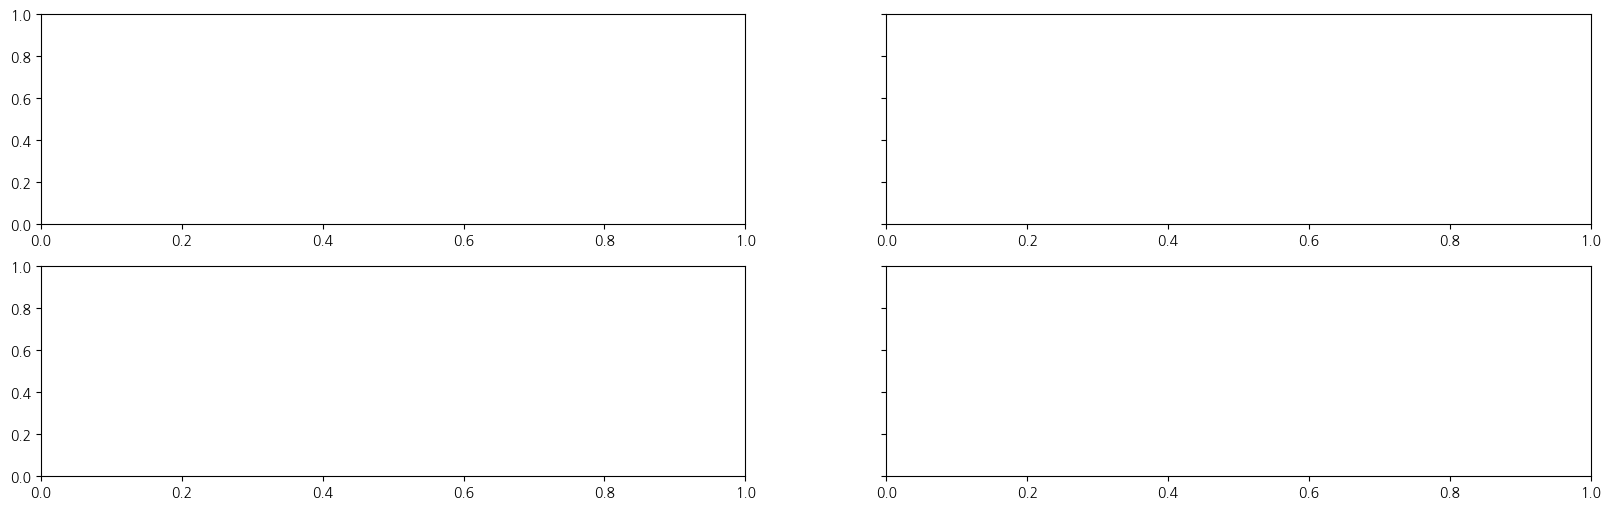

In [95]:
'''age_where = af_result2.loc[3:8, ['성산일출봉-섭지코지 인근 (성산읍)',	'중문관광단지',	'용담 해안도로 인근 (제주시)',	'곽지-한담해변 (애월읍)',	'함덕해변 (조천읍)',
                                    '이중섭 거리/서귀포 올레시장',	'협재-금릉해변 (한림읍)',	'오름/한라산',	'표선해변 (표선면)',	'월정-세화해변 (구좌읍)',	'우도',
                                    '마을관광(저지리, 가시리 등)',	'기타1',	'기타2']]
age_traffic = af_result2.loc[3:8, ['렌터카',	'버스',	'택시',	'전세버스(여행사제공)',	'기타']]
age_accom = af_result2.loc[3:8, ['5성급 호텔',	'일반호텔',	'4성급 호텔',	'펜션',	'콘도/리조트',	'게스트하우스/호스텔',	'모텔',	'친구/친척집_x',	'캠핑/글램핑']]
age_rest = af_result2.loc[3:8, ['유명 맛집(검색/소개)',	'숙박시설과 가까운 식당',	'숙박시설 내 식당',	'사람이 거의 없는 식당',	'친구/친척집_y',	'포장/배달(도시락 등)',	'직접 요리']]


x_labels = ['15-20세', '21-30세', '31-40세', '41-50세', '51-60세', '61세 이상']
# 서브플롯 생성
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(20, 6))

# 막대 그래프 너비 설정
bar_width = 0.15
index = np.arange(len(x_labels))

# 각 항목에 대해 나이 그룹 별로 상위 5위 선택 및 그래프에 그리기
age_data = af_result2[af_result2['분류'] == '연령']

top_destinations_by_age = {}
for index, row in age_data.iterrows():
    age_category = row['세부분류']
    if age_category not in top_destinations_by_age:
        top_destinations_by_age[age_category] = []

    # 관광지 및 방문 비율 추가
    for column in age_data.columns[3:17]:
        top_destinations_by_age[age_category].append((column, row[column]))

# 연령대 별로 가장 높은 관광지 5개 찾기
top5_destinations_by_age = {}
for age_category, destinations in top_destinations_by_age.items():
    # 방문 비율을 기준으로 내림차순 정렬
    sorted_destinations = sorted(destinations, key=lambda x: x[1], reverse=True)
    # 상위 5개만 선택
    top5_destinations = sorted_destinations[:5]
    top5_destinations_by_age[age_category] = top5_destinations
'''for i, label in enumerate(list(top5_destinations_by_age.keys())):
    ax[0, 0].bar(index + i * bar_width, top5_destinations_by_age[label], bar_width, label=label)
ax[0, 0].set_xticks(index + (4 - 1) * bar_width / 2)
ax[0, 0].set_xticklabels(x_labels)
ax[0, 0].set_title('방문 관광지 (상위 5위)')
ax[0, 0].set_xlabel('연령')
ax[0, 0].set_ylabel('선택률(%)')
ax[0, 0].legend()'''

print(top5_destinations_by_age)


,성산일출봉-섭지코지 인근 (성산읍),중문관광단지,용담 해안도로 인근 (제주시),곽지-한담해변 (애월읍),함덕해변 (조천읍),이중섭 거리/서귀포 올레시장,협재-금릉해변 (한림읍),오름/한라산,표선해변 (표선면),월정-세화해변 (구좌읍),우도,"마을관광(저지리, 가시리 등)",기타1,기타2
3,46.2,38.5,38.5,38.5,7.7,46.2,15.4,23.1,23.1,0.0,30.8,38.5,0.0,0.0
4,53.7,37.0,45.4,36.1,33.3,44.4,38.0,37.0,29.6,26.9,16.7,20.4,1.9,0.0
5,57.0,45.5,46.5,33.5,37.0,29.0,32.5,26.5,26.0,24.0,13.5,14.5,0.5,0.0
6,61.4,48.9,44.9,34.1,37.5,29.0,29.5,26.7,17.0,21.0,19.3,13.6,1.7,0.0
7,71.7,47.8,34.8,39.1,27.2,31.5,32.6,32.6,16.3,18.5,19.6,19.6,1.1,0.0
8,62.5,42.5,37.5,25.0,25.0,32.5,15.0,37.5,22.5,5.0,25.0,30.0,2.5,2.5


In [82]:
'''age_data = af_result2[af_result2['분류'] == '연령']
age_data

,분류,세부분류,사례수,성산일출봉-섭지코지 인근 (성산읍),중문관광단지,용담 해안도로 인근 (제주시),곽지-한담해변 (애월읍),함덕해변 (조천읍),이중섭 거리/서귀포 올레시장,협재-금릉해변 (한림읍),...,모텔,친구/친척집_x,캠핑/글램핑,유명 맛집(검색/소개),숙박시설과 가까운 식당,숙박시설 내 식당,사람이 거의 없는 식당,친구/친척집_y,포장/배달(도시락 등),직접 요리
3,연령,15~20세,13,46.2,38.5,38.5,38.5,7.7,46.2,15.4,...,7.7,0.0,7.7,76.9,7.7,0.0,15.4,0.0,0.0,0.0
4,연령,21~30세,108,53.7,37.0,45.4,36.1,33.3,44.4,38.0,...,5.6,1.9,1.9,60.2,25.9,7.4,2.8,0.0,1.9,1.9
5,연령,31~40세,200,57.0,45.5,46.5,33.5,37.0,29.0,32.5,...,2.5,1.0,0.5,66.5,23.5,7.5,0.0,0.5,1.0,1.0
6,연령,41~50세,176,61.4,48.9,44.9,34.1,37.5,29.0,29.5,...,1.7,5.1,1.1,67.6,21.0,6.8,1.1,3.4,0.0,0.0
7,연령,51~60세,92,71.7,47.8,34.8,39.1,27.2,31.5,32.6,...,3.3,2.2,1.1,67.4,25.0,4.3,1.1,1.1,0.0,1.1
8,연령,61세 이상,40,62.5,42.5,37.5,25.0,25.0,32.5,15.0,...,0.0,2.5,0.0,45.0,42.5,7.5,5.0,0.0,0.0,0.0


ValueError: ignored

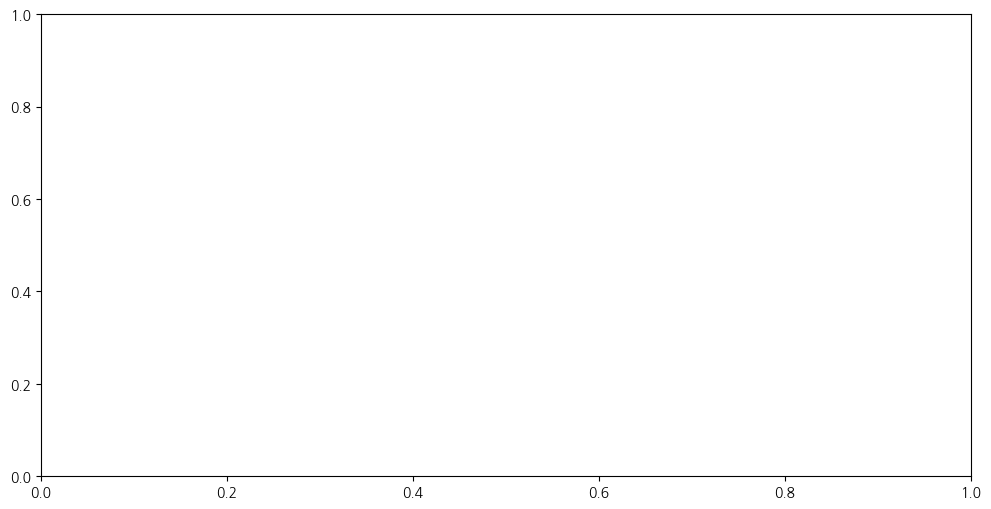

In [97]:
'''import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data = {
    '분류': ['연령', '연령', '연령', '연령', '연령', '연령'],
    '세부분류': ['15~20세', '21~30세', '31~40세', '41~50세', '51~60세', '61세 이상'],
    '사례수': [13, 108, 200, 176, 92, 40],
    '성산일출봉-섭지코지 인근 (성산읍)': [46.2, 53.7, 57.0, 61.4, 71.7, 62.5],
    '중문관광단지': [38.5, 37.0, 45.4, 48.9, 47.8, 42.5],
    '용담 해안도로 인근 (제주시)': [38.5, 45.4, 46.5, 44.9, 34.8, 37.5],
    '곽지-한담해변 (애월읍)': [38.5, 36.1, 33.5, 34.1, 39.1, 25.0],
    '함덕해변 (조천읍)': [7.7, 33.3, 37.0, 37.5, 27.2, 25.0],
    '이중섭 거리/서귀포 올레시장': [46.2, 44.4, 29.0, 29.0, 31.5, 32.5],
    '협재-금릉해변 (한림읍)': [15.4, 38.0, 32.5, 29.5, 32.6, 37.5],
    '오름/한라산': [23.1, 37.0, 26.5, 26.7, 16.3, 22.5],
    '표선해변 (표선면)': [23.1, 29.6, 26.0, 17.0, 18.5, 5.0],
    '월정-세화해변 (구좌읍)': [0.0, 26.9, 24.0, 21.0, 19.6, 25.0],
    '우도': [30.8, 16.7, 13.5, 19.3, 19.6, 30.0],
    '마을관광(저지리, 가시리 등)': [38.5, 20.4, 14.5, 13.6, 1.1, 2.5],
    '기타1': [0.0, 1.9, 0.5, 1.7, 0.0, 2.5],
    '기타2': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 그래프를 그릴 때 사용할 색상 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 그래프 생성
plt.figure(figsize=(12, 6))

# 연령대를 x축으로 설정
x = np.arange(len(df['세부분류']))

# 각 연령대 별로 관광지의 방문 비율을 그래프로 표현
for i, row in df.iterrows():
    age_category = row['세부분류']
    visit_rates = row.iloc[3:].values.tolist()  # 3번째 열부터 방문 비율 데이터
    plt.bar(x + i * 0.15, visit_rates, width=0.15, label=age_category, color=colors[i])

# x축 레이블 설정
plt.xticks(x + 0.3, df['세부분류'])

# 그래프 제목과 레이블 설정
plt.title('연령대 별로 가장 인기 있는 관광지')
plt.xlabel('연령')
plt.ylabel('방문 비율 (%)')

# 범례 표시
plt.legend(title='연령대')

# 그래프 출력
plt.tight_layout()
plt.show()

In [98]:
'''top5_destinations_by_age

{'15~20세': [('성산일출봉-섭지코지 인근 (성산읍)', 46.2),
  ('이중섭 거리/서귀포 올레시장', 46.2),
  ('중문관광단지', 38.5),
  ('용담 해안도로 인근 (제주시)', 38.5),
  ('곽지-한담해변 (애월읍)', 38.5)],
 '21~30세': [('성산일출봉-섭지코지 인근 (성산읍)', 53.7),
  ('용담 해안도로 인근 (제주시)', 45.4),
  ('이중섭 거리/서귀포 올레시장', 44.4),
  ('협재-금릉해변 (한림읍)', 38.0),
  ('중문관광단지', 37.0)],
 '31~40세': [('성산일출봉-섭지코지 인근 (성산읍)', 57.0),
  ('용담 해안도로 인근 (제주시)', 46.5),
  ('중문관광단지', 45.5),
  ('함덕해변 (조천읍)', 37.0),
  ('곽지-한담해변 (애월읍)', 33.5)],
 '41~50세': [('성산일출봉-섭지코지 인근 (성산읍)', 61.4),
  ('중문관광단지', 48.9),
  ('용담 해안도로 인근 (제주시)', 44.9),
  ('함덕해변 (조천읍)', 37.5),
  ('곽지-한담해변 (애월읍)', 34.1)],
 '51~60세': [('성산일출봉-섭지코지 인근 (성산읍)', 71.7),
  ('중문관광단지', 47.8),
  ('곽지-한담해변 (애월읍)', 39.1),
  ('용담 해안도로 인근 (제주시)', 34.8),
  ('협재-금릉해변 (한림읍)', 32.6)],
 '61세 이상': [('성산일출봉-섭지코지 인근 (성산읍)', 62.5),
  ('중문관광단지', 42.5),
  ('용담 해안도로 인근 (제주시)', 37.5),
  ('오름/한라산', 37.5),
  ('이중섭 거리/서귀포 올레시장', 32.5)]}

IndexError: ignored

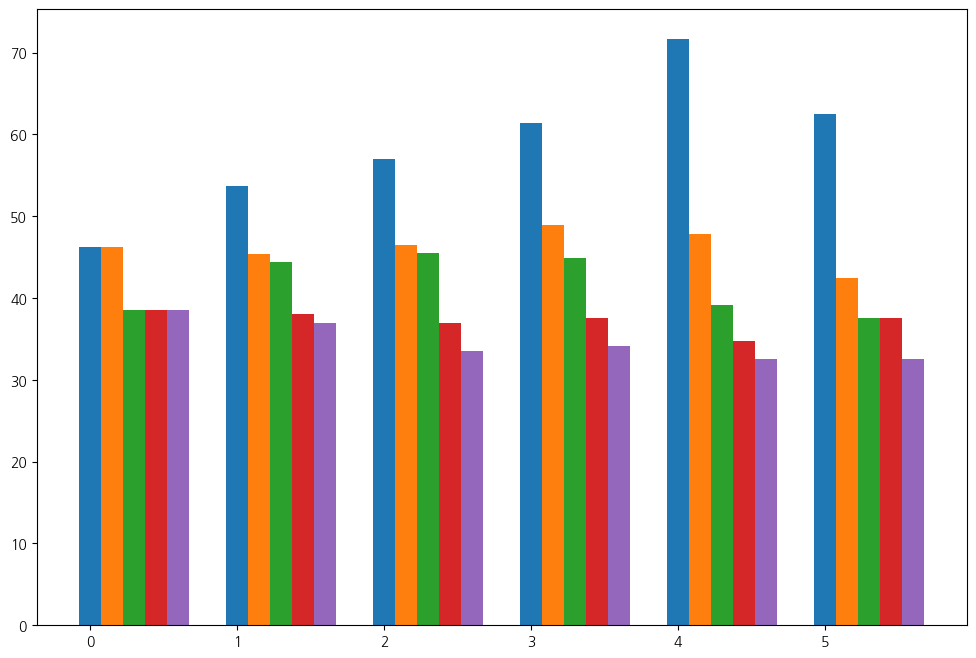

In [111]:
'''import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data = {
    '15~20세': [('성산일출봉-섭지코지 인근 (성산읍)', 46.2),
               ('이중섭 거리/서귀포 올레시장', 46.2),
               ('중문관광단지', 38.5),
               ('용담 해안도로 인근 (제주시)', 38.5),
               ('곽지-한담해변 (애월읍)', 38.5)],
    '21~30세': [('성산일출봉-섭지코지 인근 (성산읍)', 53.7),
               ('용담 해안도로 인근 (제주시)', 45.4),
               ('이중섭 거리/서귀포 올레시장', 44.4),
               ('협재-금릉해변 (한림읍)', 38.0),
               ('중문관광단지', 37.0)],
    '31~40세': [('성산일출봉-섭지코지 인근 (성산읍)', 57.0),
               ('용담 해안도로 인근 (제주시)', 46.5),
               ('중문관광단지', 45.5),
               ('함덕해변 (조천읍)', 37.0),
               ('곽지-한담해변 (애월읍)', 33.5)],
    '41~50세': [('성산일출봉-섭지코지 인근 (성산읍)', 61.4),
               ('중문관광단지', 48.9),
               ('용담 해안도로 인근 (제주시)', 44.9),
               ('함덕해변 (조천읍)', 37.5),
               ('곽지-한담해변 (애월읍)', 34.1)],
    '51~60세': [('성산일출봉-섭지코지 인근 (성산읍)', 71.7),
               ('중문관광단지', 47.8),
               ('곽지-한담해변 (애월읍)', 39.1),
               ('용담 해안도로 인근 (제주시)', 34.8),
               ('협재-금릉해변 (한림읍)', 32.6)],
    '61세 이상': [('성산일출봉-섭지코지 인근 (성산읍)', 62.5),
               ('중문관광단지', 42.5),
               ('용담 해안도로 인근 (제주시)', 37.5),
               ('오름/한라산', 37.5),
               ('이중섭 거리/서귀포 올레시장', 32.5)]
}
x_labels = ['15~20세', '21~30세', '31~40세', '41~50세', '51~60세', '61세 이상']
# 연령대 목록
age_groups = list(data.keys())

# 관광지 목록 추출
destinations = [item[0] for sublist in data.values() for item in sublist]
# 방문 비율 추출
visit_rates = [item[1] for sublist in data.values() for item in sublist]

# x축을 연령대로 설정
x = np.arange(len(age_groups))

# 그래프 생성
plt.figure(figsize=(12, 8))
bar_width = 0.15

# 각 관광지별로 그래프 생성
for i, destination in enumerate(destinations):
    plt.bar(x + i * bar_width, [data[age_group][i][1] for age_group in age_groups], bar_width, label=destination)

# x축 설정
plt.xlabel('연령대')
plt.ylabel('방문 비율 (%)')
plt.title('연령대별 인기 관광지 Top 5')
plt.xticks(x + (len(destinations) / 2 - 0.5) * bar_width, age_groups)
plt.legend()
plt.show()

ValueError: ignored

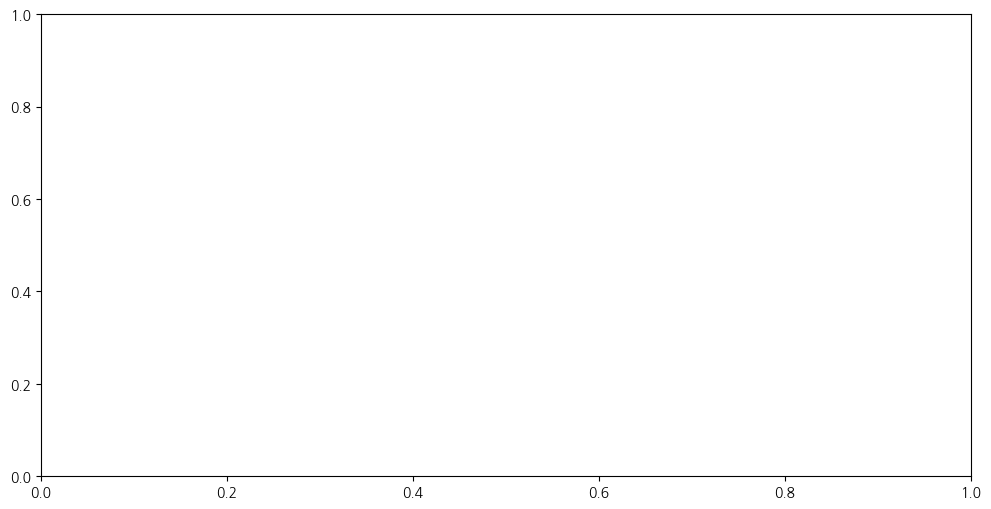

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터
data = {
    '15~20세': [('성산일출봉-섭지코지 인근 (성산읍)', 46.2),
               ('이중섭 거리/서귀포 올레시장', 46.2),
               ('중문관광단지', 38.5),
               ('용담 해안도로 인근 (제주시)', 38.5),
               ('곽지-한담해변 (애월읍)', 38.5)],
    '21~30세': [('성산일출봉-섭지코지 인근 (성산읍)', 53.7),
               ('용담 해안도로 인근 (제주시)', 45.4),
               ('이중섭 거리/서귀포 올레시장', 44.4),
               ('협재-금릉해변 (한림읍)', 38.0),
               ('중문관광단지', 37.0)],
    '31~40세': [('성산일출봉-섭지코지 인근 (성산읍)', 57.0),
               ('용담 해안도로 인근 (제주시)', 46.5),
               ('중문관광단지', 45.5),
               ('함덕해변 (조천읍)', 37.0),
               ('곽지-한담해변 (애월읍)', 33.5)],
    '41~50세': [('성산일출봉-섭지코지 인근 (성산읍)', 61.4),
               ('중문관광단지', 48.9),
               ('용담 해안도로 인근 (제주시)', 44.9),
               ('함덕해변 (조천읍)', 37.5),
               ('곽지-한담해변 (애월읍)', 34.1)],
    '51~60세': [('성산일출봉-섭지코지 인근 (성산읍)', 71.7),
               ('중문관광단지', 47.8),
               ('곽지-한담해변 (애월읍)', 39.1),
               ('용담 해안도로 인근 (제주시)', 34.8),
               ('협재-금릉해변 (한림읍)', 32.6)],
    '61세 이상': [('성산일출봉-섭지코지 인근 (성산읍)', 62.5),
               ('중문관광단지', 42.5),
               ('용담 해안도로 인근 (제주시)', 37.5),
               ('오름/한라산', 37.5),
               ('이중섭 거리/서귀포 올레시장', 32.5)]
}

# 나이대 (x축) 정의
ages = ['15~20세', '21~30세', '31~40세', '41~50세', '51~60세', '61세 이상']

# 그래프 그리기
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(ages))

for i, age_group in enumerate(ages):
    visit_rates_for_age = [data[age_group][j][1] for j in range(len(data[age_group]))]
    plt.bar(index + i * bar_width, visit_rates_for_age, bar_width, label=age_group)

plt.xlabel('나이대')
plt.ylabel('방문율')
plt.title('나이대별 관광지 방문율')
plt.xticks(index + bar_width * (len(ages) - 1) / 2, [spot[0] for spot in data[ages[0]]])
plt.legend()
plt.tight_layout()

# 그래프 표시
plt.show()






